In [31]:
import mysql.connector
from datetime import datetime




def get_table_names(host, user, password, database):
    try:
        # Establish a database connection
        conn = mysql.connector.connect(
            host=host,
            user=user,
            password=password,
            database=database
        )

        # Create a cursor object
        cursor = conn.cursor()

        # Execute a query to retrieve table names
        query = f"SELECT table_name FROM INFORMATION_SCHEMA.TABLES WHERE table_schema = '{database}'"
        cursor.execute(query)

        # Fetch all the rows
        tables = cursor.fetchall()

        # Print table names
        # for (table_name,) in tables:
        #     print(table_name)

    except mysql.connector.Error as error:
        print(f"Error: {error}")
    finally:
        if conn.is_connected():
            cursor.close()
            conn.close()
            return tables


In [32]:
import mysql.connector
import pandas as pd

def table_to_dataframe(host, user, password, database, table_name):
    try:
        # Establish a database connection
        conn = mysql.connector.connect(
            host=host,
            user=user,
            password=password,
            database=database
        )

        # Use backticks around the table name in the query
        query = f"SELECT * FROM `{table_name}`"

        # Use pandas to read the query into a DataFrame
        df = pd.read_sql(query, conn)

        return df

    except mysql.connector.Error as error:
        print(f"Error: {error}")
        return None
    finally:
        if conn.is_connected():
            conn.close()


In [39]:

databaseA = "A" + datetime.now().strftime("%Y%m%d") 
password = '93150lbm!!'

tables = get_table_names('127.0.0.1', 'root', password, databaseA)

code = tables[0][0]
print(code)


009520


In [45]:
# Usage
df = table_to_dataframe('127.0.0.1', 'root', password, databaseA, code)
if df is not None:
    print(df)
    # Assuming df is your DataFrame
    df_sorted = df.sort_values(by='체결시간')
    print(df_sorted)


        id                      체결시간     현재가   거래량
0        1  20240111 13:09:56.486149  +29850    +8
1        2  20240111 13:09:59.850294  +29850    +1
2        3  20240111 13:10:04.490936  +29850    +1
3        4  20240111 13:10:07.053451  +29850    +1
4        5  20240111 13:10:24.954138  +29850    +8
...    ...                       ...     ...   ...
2658  2659  20240111 15:19:53.122531  +29650    -5
2659  2660  20240111 15:19:57.175281  +29700    +1
2660  2661  20240111 15:19:57.175281  +29700  +300
2661  2662  20240111 15:19:53.678599  +29700   +35
2662  2663  20240111 15:19:58.389828  +29700    +1

[2663 rows x 4 columns]
        id                      체결시간     현재가   거래량
0        1  20240111 13:09:56.486149  +29850    +8
1        2  20240111 13:09:59.850294  +29850    +1
2        3  20240111 13:10:04.490936  +29850    +1
3        4  20240111 13:10:07.053451  +29850    +1
4        5  20240111 13:10:24.954138  +29850    +8
...    ...                       ...     ...   ...
2652  

C:\Users\pari0\AppData\Local\Temp\ipykernel_5916\2766947471.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert '체결시간' to datetime
df_sorted['체결시간'] = pd.to_datetime(df_sorted['체결시간'])

# Convert '거래량' to numeric, removing any '+' or '-'
df_sorted['거래량'] = pd.to_numeric(df_sorted['거래량'].str.replace('+','').str.replace('-',''), errors='coerce')

# print(df)



# Group by minute and sum '거래량'
df_grouped = df_sorted.resample('T', on='체결시간').sum()

print(df_grouped)
# Plotting
# plt.figure(figsize=(12,6))
# df_grouped['거래량'].plot(kind='bar')
# plt.title('거래량 by Minute')
# plt.xlabel('Minute')
# plt.ylabel('거래량')
# plt.show()


                         id  \
체결시간                          
2024-01-11 13:09:00       3   
2024-01-11 13:10:00     102   
2024-01-11 13:11:00     976   
2024-01-11 13:12:00     689   
2024-01-11 13:13:00     931   
...                     ...   
2024-01-11 15:15:00   56788   
2024-01-11 15:16:00   87433   
2024-01-11 15:17:00  121909   
2024-01-11 15:18:00  116358   
2024-01-11 15:19:00  144975   

                                                                   현재가   거래량  
체결시간                                                                          
2024-01-11 13:09:00                                       +29850+29850     9  
2024-01-11 13:10:00  +29850+29850+29850+29850+29850+29850+29850+298...   448  
2024-01-11 13:11:00  +29800+29850+29850+29850+29850+29850+29850+298...  2402  
2024-01-11 13:12:00  +29850+29850+29850+29850+29800+29850+29850+298...   122  
2024-01-11 13:13:00  +29850+29800+29850+29850+29850+29850+29850+298...   305  
...                                        

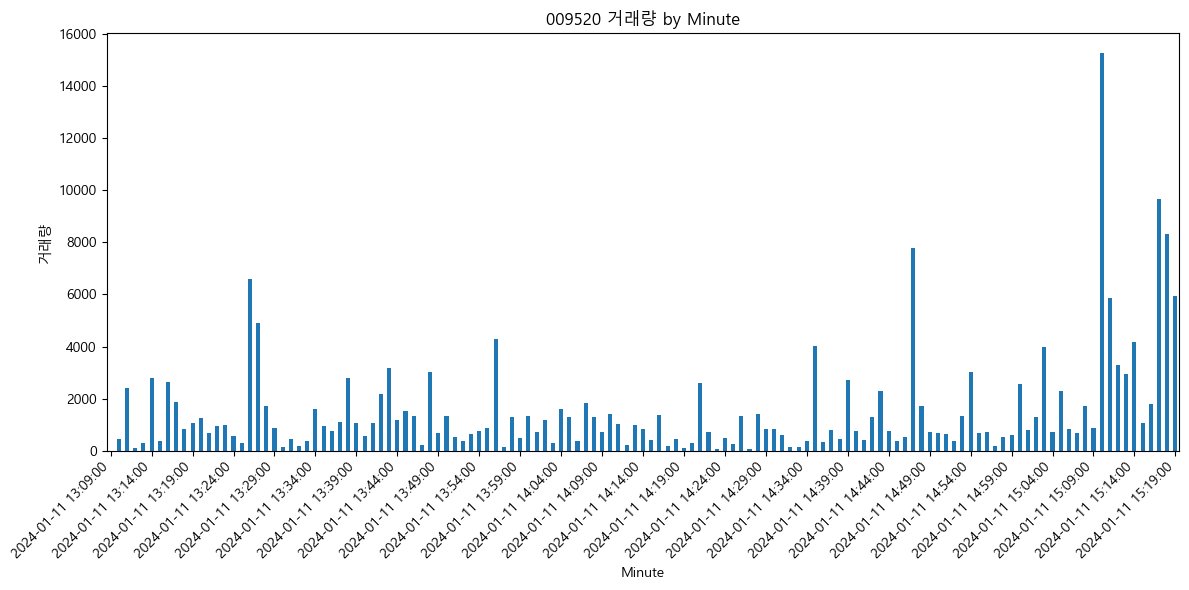

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set Korean font
plt.rcParams['font.family'] = 'Malgun Gothic' 

# Assuming df_grouped is your DataFrame grouped by minute

# Plotting
plt.figure(figsize=(12,6))
ax = df_grouped['거래량'].plot(kind='bar')

# Set x-ticks
ticks = ax.get_xticks()
ticklabels = [l.get_text() for l in ax.get_xticklabels()]
ax.set_xticks(ticks[::5])  # Show every 5th tick
ax.set_xticklabels(ticklabels[::5], rotation=45, ha="right")  # Adjust rotation and alignment as needed

plt.title(f'{code} 거래량 by Minute')
plt.xlabel('Minute')
plt.ylabel('거래량')
plt.tight_layout()  # Adjust layout
plt.show()


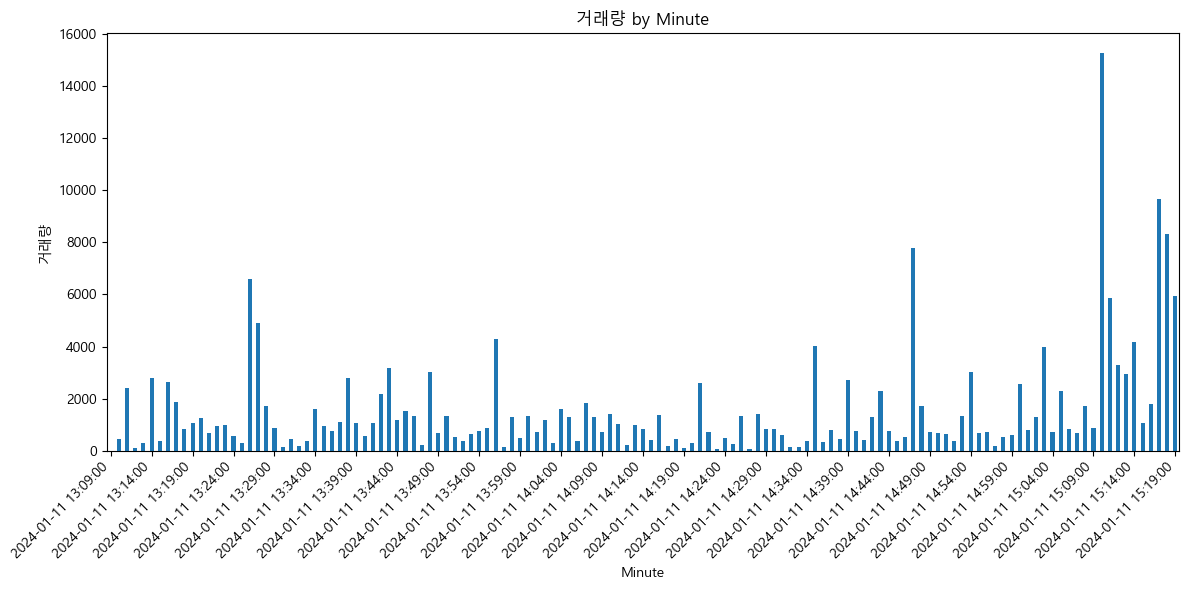

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm
import mplcursors

# Set Korean font
plt.rcParams['font.family'] = 'Malgun Gothic' 

# Assuming df_grouped is your DataFrame grouped by minute

# Plotting
plt.figure(figsize=(12,6))
ax = df_grouped['거래량'].plot(kind='bar')

# Adding cursor functionality
cursor = mplcursors.cursor(ax, hover=True)

@cursor.connect("add")
def on_add(sel):
    x = sel.target.index
    y = sel.target
    sel.annotation.set(text=f'거래량: {y}', position=(x, y))
    sel.annotation.get_bbox_patch().set(fc="white", alpha=0.6)

# Set x-ticks
ticks = ax.get_xticks()
ticklabels = [l.get_text() for l in ax.get_xticklabels()]
ax.set_xticks(ticks[::5])  # Show every 5th tick
ax.set_xticklabels(ticklabels[::5], rotation=45, ha="right")  # Adjust rotation and alignment as needed

plt.title('거래량 by Minute')
plt.xlabel('Minute')
plt.ylabel('거래량')
plt.tight_layout()  # Adjust layout
plt.show()
